#### This notebook is to perform Redundancy analysis on beta diversities

In [1]:
library(vegan)
library(ggplot2)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [2]:
mf = read.csv('mapping_sleep_alpha.txt', sep='\t')
colnames(mf)[1] = 'SampleName'
dim(mf)

[1] 599  80

In [3]:
head(mf)

,SampleName,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,⋯,M1ADEPR,M1BENZO,AMAMPT_C1,AMFVT_C1,AMPHIT_15SD,Description,alpha_pd,observed_otus,shannon,pielou_e
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>
1,BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,Missing:not collected,Missing:not collected,Missing:not collected,Orwoll.BI0023.BI,27.77117,302,5.727116,0.6951729
2,BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,0.0,Orwoll.BI0056.BI,17.93266,173,3.888281,0.5229960
3,BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,0.0,Orwoll.BI0131.BI,21.45366,223,4.050730,0.5192645
4,BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,-1.0,Orwoll.BI0153.BI,18.46968,223,4.894253,0.6273959
5,BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,0.0,-1.0,Orwoll.BI0215.BI,20.04983,222,5.295055,0.6793396
6,BI0353,TGCCATCTGAAT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,⋯,0: No,0: No,1.0,1.0,0.0,Orwoll.BI0353.BI,13.75183,155,4.213016,0.5790192


In [4]:
pc = read.csv('~/Downloads/lab/sleep/Results/ordination/ordination.txt', header=F, sep='\t', skip = 4543)
colnames(pc) = c('SampleName', 'PC1', 'PC2', 'PC3')
dim(pc)
head(pc)              

[1] 601   4

,SampleName,PC1,PC2,PC3
,<fct>,<dbl>,<dbl>,<dbl>
1,MN1696,-0.01572254,-0.04562222,-0.009077330
2,PI4923,0.03410057,0.00883331,0.036736761
3,PA3754,-0.03684407,0.04831507,-0.046623863
4,PI4717,0.01563000,-0.02796466,-0.004461581
5,PA3960,0.04218699,-0.04054513,-0.015946403
6,MN1521,-0.06798356,0.01172051,0.077248450


In [5]:
dat = merge(mf, pc, by='SampleName')
dim(dat)

[1] 599  83

In [6]:
# convert categorial to factors
vars_cat = c('GIERACE', 'SITE', 'GIMSTAT', 'MHDIAB', 'MHRHEU1', 'MHOA', 'MHCHF', 'MHMI', 'MHDEPR', 
             'TUDRAMT_REVISED', 'PQPSLMED', 'PQPSQUAL', 'QLCOMP', 'SLEEPHRS', 'PQBADSLP', 
             'TURSMOKE', 'M1ADEPR', 'M1BENZO', 'PQPEFFIC', 'AMAMPT_C1', 'AMFVT_C1', 'AMPHIT_15SD')
dat[vars_cat] = lapply(dat[vars_cat], factor)

# # convert continuous to numeric
vars_cts = c('Age', 'BMI', 'PASCORE')
vars_pcs = c('PC1', 'PC2', 'PC3')

dat = dat[c(vars_cat, vars_cts, vars_pcs)]
dat = dat[complete.cases(dat), ]
X = dat[c(vars_cat, vars_cts)]
Y = dat[, vars_pcs]

dim(X)
dim(Y)

head(X)
head(Y)

[1] 599  25

[1] 599   3

,GIERACE,SITE,GIMSTAT,MHDIAB,MHRHEU1,MHOA,MHCHF,MHMI,MHDEPR,TUDRAMT_REVISED,⋯,TURSMOKE,M1ADEPR,M1BENZO,PQPEFFIC,AMAMPT_C1,AMFVT_C1,AMPHIT_15SD,Age,BMI,PASCORE
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
1,1:WHITE,Birmingham,2: Widowed,0: No,0: No,0: No,0: No,0: No,0: No,1: Less than one drink per week,⋯,M:Not Applicable,0: No,0: No,0:>85% EFFICIENCY,Missing:not collected,Missing:not collected,Missing:not collected,83,28.89012,91.00000
2,1:WHITE,Birmingham,1: Married,0: No,1: Yes,1: Yes,1: Yes,1: Yes,0: No,0:None drinker,⋯,1:PAST,0: No,0: No,3:<65% EFFICIENCY,1.0,1.0,0.0,81,28.53980,199.17857
3,1:WHITE,Birmingham,1: Married,0: No,0: No,0: No,0: No,0: No,0: No,0:None drinker,⋯,1:PAST,0: No,0: No,0:>85% EFFICIENCY,1.0,1.0,0.0,83,25.01424,161.71429
4,1:WHITE,Birmingham,1: Married,0: No,0: No,0: No,0: No,0: No,0: No,4: 6-13 drinks per week,⋯,1:PAST,0: No,0: No,0:>85% EFFICIENCY,1.0,1.0,-1.0,79,30.87637,88.21429
5,1:WHITE,Birmingham,1: Married,0: No,0: No,1: Yes,0: No,0: No,0: No,3: 3-5 drinks per week,⋯,1:PAST,0: No,0: No,0:>85% EFFICIENCY,1.0,0.0,-1.0,81,33.58739,256.82143
6,1:WHITE,Birmingham,1: Married,0: No,0: No,0: No,0: No,0: No,0: No,0:None drinker,⋯,1:PAST,0: No,0: No,1:>=75% TO <=85% EFFICIENCY,1.0,1.0,0.0,80,26.41523,179.57143


,PC1,PC2,PC3
,<dbl>,<dbl>,<dbl>
1,-0.068734862,0.01375740,-0.006227410
2,0.083499986,-0.02233200,-0.009408162
3,0.021765640,0.02795400,0.010326054
4,0.031469528,0.01069463,0.012727919
5,0.027728490,-0.01835689,0.025420916
6,-0.009028151,-0.02402834,0.025013378


In [7]:
mod0 <- rda(Y ~ 1., X)  # Model with intercept only
mod1 <- rda(Y ~ ., X)  # Model with all explanatory variables

In [8]:
step.res <- ordiR2step(mod0, mod1, perm.max = 1000)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                    R2.adjusted
<All variables>    0.0553396657
+ GIERACE          0.0212659989
+ PASCORE          0.0108336143
+ MHDIAB           0.0102277624
+ SITE             0.0079410795
+ M1ADEPR          0.0071428549
+ AMFVT_C1         0.0071073862
+ BMI              0.0052285766
+ PQBADSLP         0.0044767415
+ AMPHIT_15SD      0.0042169922
+ PQPEFFIC         0.0038819240
+ MHDEPR           0.0027601549
+ MHOA             0.0026403285
+ Age              0.0022206121
+ PQPSQUAL         0.0021820901
+ GIMSTAT          0.0018193795
+ TURSMOKE         0.0015238012
+ SLEEPHRS         0.0010555394
+ PQPSLMED         0.0009710425
+ TUDRAMT_REVISED  0.0005936172
+ M1BENZO          0.0004094830
+ AMAMPT_C1        0.0001422946
<none>             0.0000000000
+ QLCOMP          -0.0003964440
+ MHRHEU1         -0.0004473415
+ MHCHF           -0.0010117996
+ MHMI            -0.0013239583

          Df     AIC      F Pr(>F)   
+ GIERACE  4 -3179.6 4.2483  0.00

In [9]:
table = step.res$anova
table

,R2.adj,Df,AIC,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
+ GIERACE,0.02126600,4,-3179.589,4.248346,0.002
+ PASCORE,0.03186304,1,-3185.119,7.501807,0.002
+ SITE,0.03985381,5,-3185.156,1.987043,0.014
+ M1ADEPR,0.04610928,1,-3188.090,4.856019,0.004
+ MHDIAB,0.05119254,1,-3190.312,4.144864,0.008
<All variables>,0.05533967,NA,NA,NA,NA


In [10]:
table$ES.RDA = c(table$R2.adj[1], table$R2.adj[2]-table$R2.adj[1], 
                       table$R2.adj[3]-table$R2.adj[2], table$R2.adj[4]-table$R2.adj[3],
                       table$R2.adj[5]-table$R2.adj[4], table$R2.adj[6]-table$R2.adj[5])
table = table[-6, ]

step.res$call

rda(formula = Y ~ GIERACE + PASCORE + SITE + M1ADEPR + MHDIAB, 
    data = X)

In [11]:
table

,R2.adj,Df,AIC,F,Pr(>F),ES.RDA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
+ GIERACE,0.02126600,4,-3179.589,4.248346,0.002,0.021265999
+ PASCORE,0.03186304,1,-3185.119,7.501807,0.002,0.010597037
+ SITE,0.03985381,5,-3185.156,1.987043,0.014,0.007990772
+ M1ADEPR,0.04610928,1,-3188.090,4.856019,0.004,0.006255477
+ MHDIAB,0.05119254,1,-3190.312,4.144864,0.008,0.005083255


null device 
          1

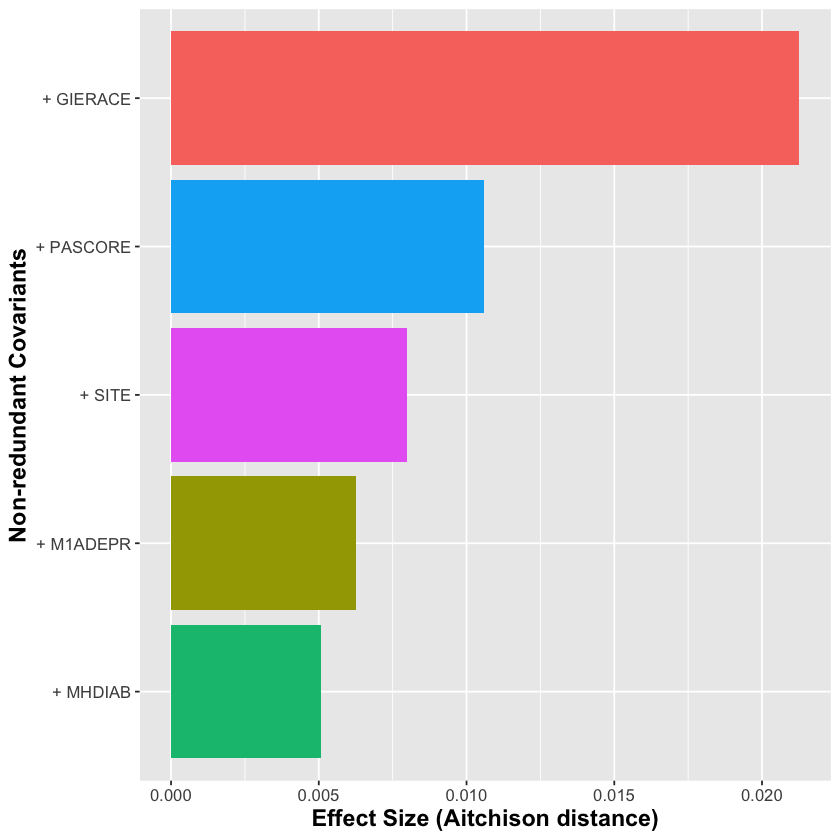

In [12]:
#make plot
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants', y = 'Effect Size (Aitchison distance)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()
dev.off()
